# Portofolio: Binary Classification Analysis - Understanding Customer Churn Using Predictive Analysis Approach

# Business Understanding

## Introduction

The fitness center is facing a challenge with customer retention. After offering a 99% discount for the first month, a significant number of customers choose not to continue their subscriptions. To address this, the marketing team has created a questionnaire aimed at gathering insights from customers willing to spend 10 to 15 minutes sharing their feedback. The goal is to understand the factors influencing customer retention and improve decision-making to reduce churn.

## Objectives

This project aims to predict customer retention by identifying whether or not customers will continue their subscription after the discounted period. Additionally, we will explore the factors that most significantly contribute to customer retention, enabling the fitness center to make data-driven decisions to enhance customer loyalty and reduce churn rates.

## Tools and Dataset Needed

To carry out this analysis, the project will utilize Python and its powerful libraries such as NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, and XGBoost. The dataset consists of responses from customers who completed the marketing questionnaire, providing valuable information on customer behavior, preferences, and potential reasons for discontinuing their subscription.

## Methodology

The analysis will employ a binary classification approach, predicting whether customers will continue their subscription (0) or churn (1). Given the size of the dataset (less than 100,000 samples), ensemble methods such as Random Forest and Gradient Boosting are chosen, as they are robust to outliers and can effectively capture complex patterns in the data.

# Data Understanding

## Data Acquisition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('data/fitness_churn.csv')
print(dataset.head())

   distance (km)  visit  price_value  height  weight  equipment  \
0            0.6     11           16     175      85          8   
1            0.5     10           16     174      80          8   
2            0.3     15           21     172      93          7   
3            0.5     11           17     169      74          8   
4            0.2     15           20     166     103          7   

        platform extention  gender  
0         tiktok  continue    male  
1         tiktok  continue  female  
2       linkedin  continue  female  
3        youtube  continue    male  
4  search engine  continue    male  


## Data Profiling

In [3]:
# dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance (km)  569 non-null    float64
 1   visit          569 non-null    int64  
 2   price_value    569 non-null    int64  
 3   height         569 non-null    int64  
 4   weight         569 non-null    int64  
 5   equipment      569 non-null    int64  
 6   platform       569 non-null    object 
 7   extention      569 non-null    object 
 8   gender         569 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 40.1+ KB


In [4]:
# missing values
dataset.isna().sum()

distance (km)    0
visit            0
price_value      0
height           0
weight           0
equipment        0
platform         0
extention        0
gender           0
dtype: int64

In [5]:
# duplicated values
dataset.duplicated().sum()

np.int64(0)

In [6]:
# correct wrong format

Because the sample is less than 100K, I'm afraid that we can only choose few models to compare.

## Descriptive Statistics

In [7]:
print(dataset.describe())

       distance (km)       visit  price_value      height      weight  \
count     569.000000  569.000000   569.000000  569.000000  569.000000   
mean        0.710018   12.239016    14.889279  170.597540   85.256591   
std         0.395825    4.702691     3.320875    3.759223   11.460168   
min         0.200000    1.000000     3.000000  157.000000   46.000000   
25%         0.500000   10.000000    13.000000  169.000000   78.000000   
50%         0.600000   12.000000    15.000000  171.000000   84.000000   
75%         0.800000   14.000000    17.000000  173.000000   91.000000   
max         3.000000   75.000000    29.000000  190.000000  130.000000   

        equipment  
count  569.000000  
mean     7.641476  
std      1.798308  
min      1.000000  
25%      7.000000  
50%      8.000000  
75%      9.000000  
max     17.000000  


In [8]:
def visualize(x, types):
    if types == 'numeric':
        plt.figure(figsize=(16,5))
        sns.histplot(x, kde=True)
        plt.show()
        
        plt.figure(figsize=(16,5))
        sns.boxplot(x=x)
        plt.show()

    elif types == 'categorical':
        plt.figure(figsize=(16,5))
        sns.barplot(x, errorbar=None, orient='h')
        plt.show()

### Numeric

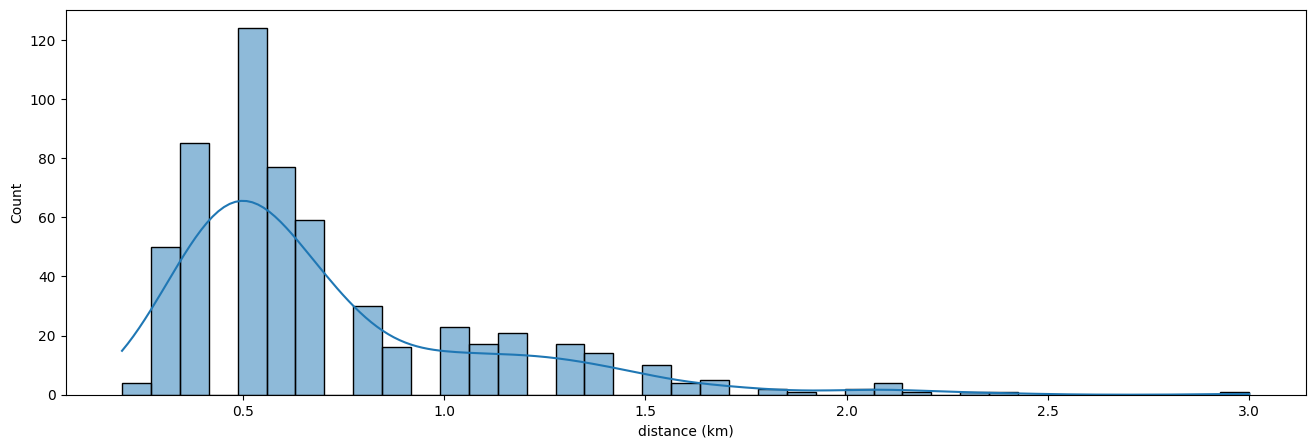

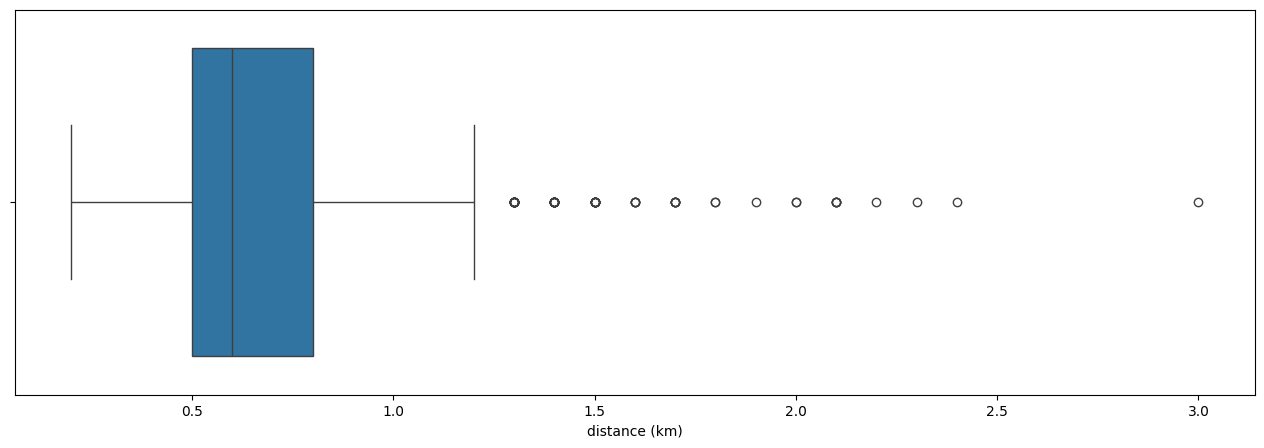

In [9]:
visualize(dataset['distance (km)'], 'numeric')

We see that the customers mostly come from the near area of the fitness center for each branches.

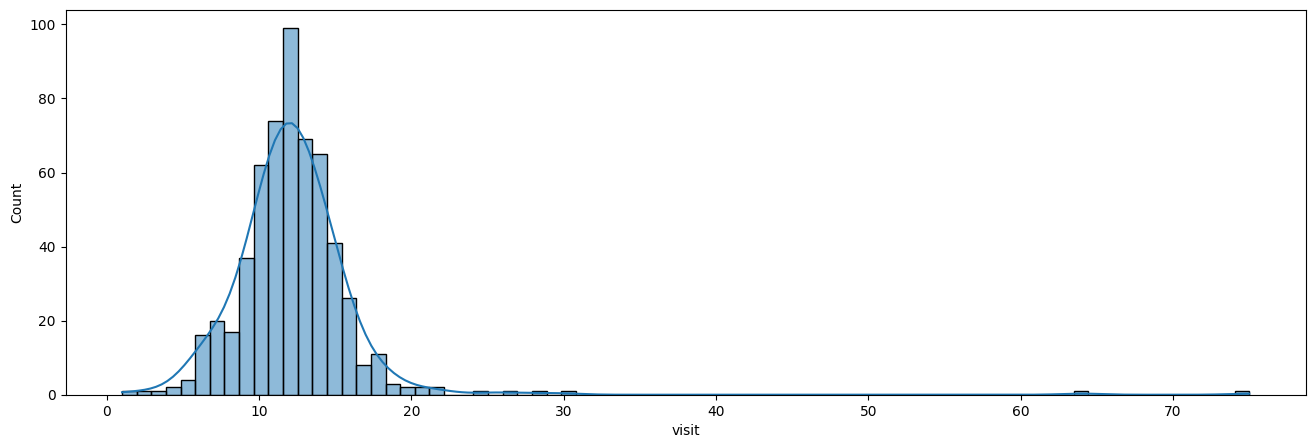

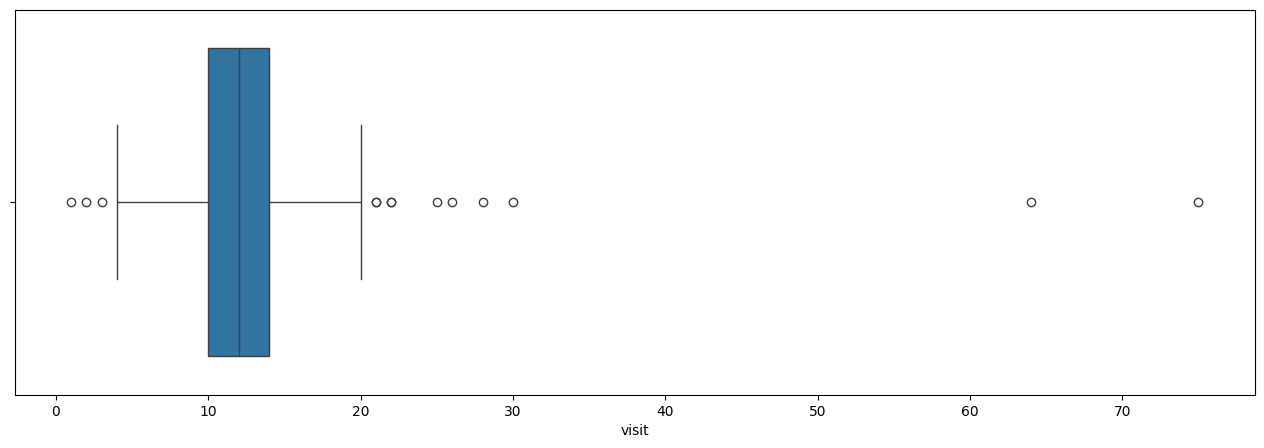

In [10]:
visualize(dataset['visit'], 'numeric')

Normally days in one month is 30 days. Because it looks like 75 visits for one month, we can assume that they count visit per month, not day per month. There are two outliers that they visit the fitness center like three times a day for one month.

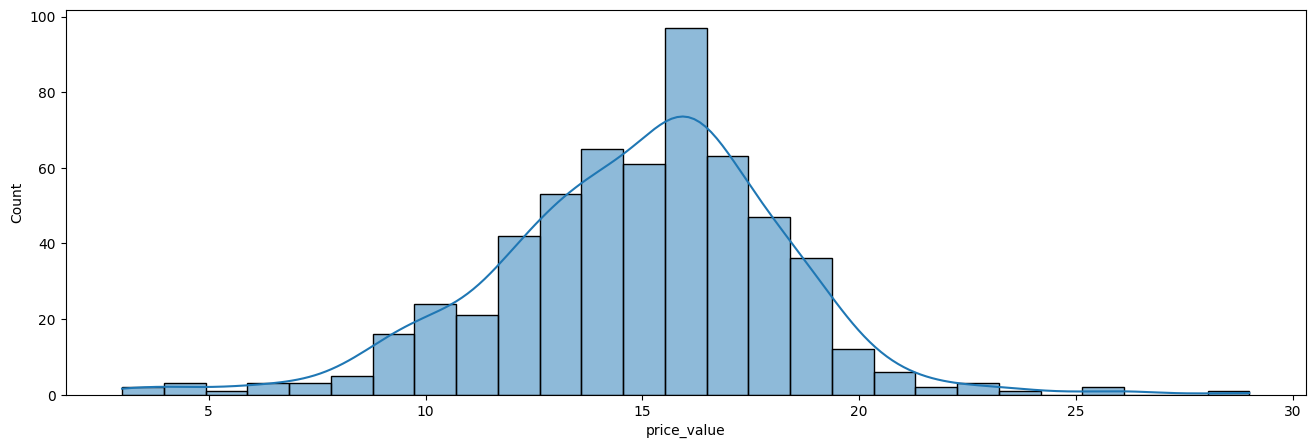

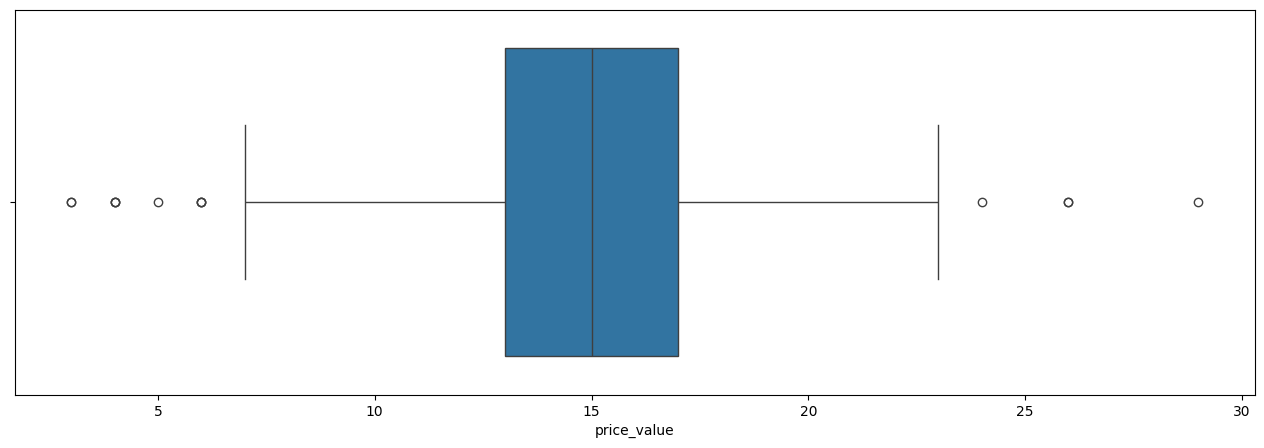

In [11]:
visualize(dataset['price_value'], 'numeric')

because price value is an ordinal variable contains 3 questions scoring from 1 to 10 and they sum up, the lowest value would be 3. To me, the shape looks good with few outliers. It looks like gaussian.

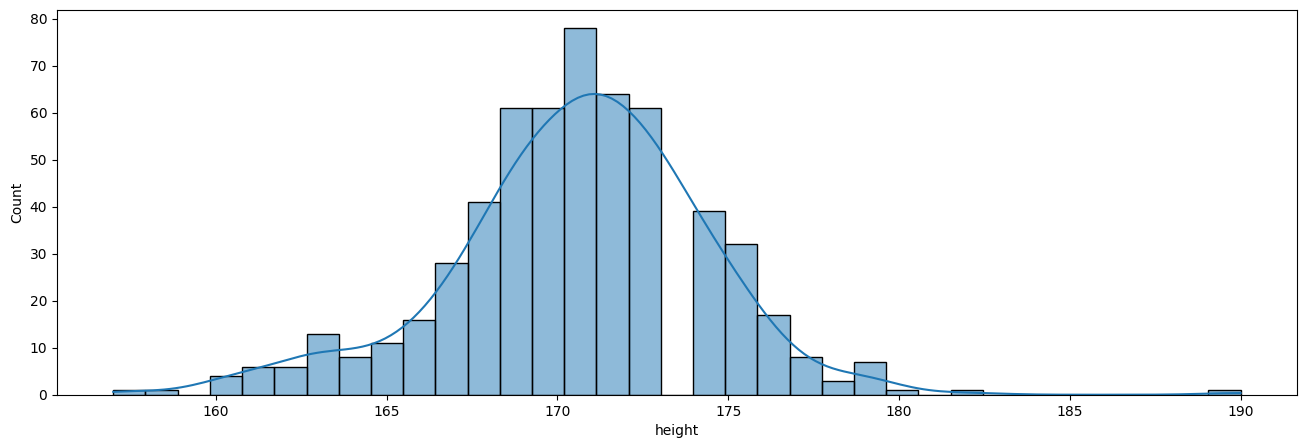

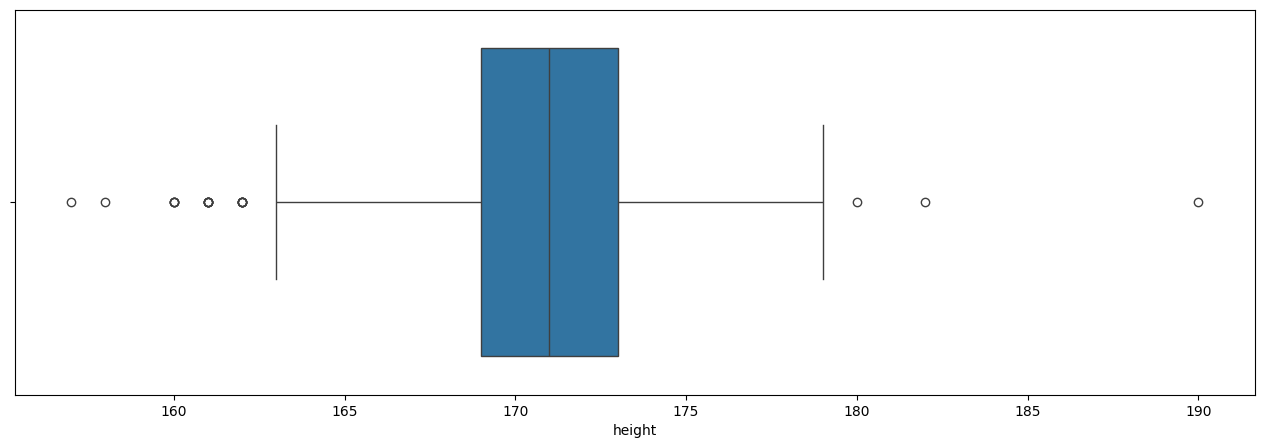

In [12]:
visualize(dataset['height'], 'numeric')

The data looks like normally distributed.

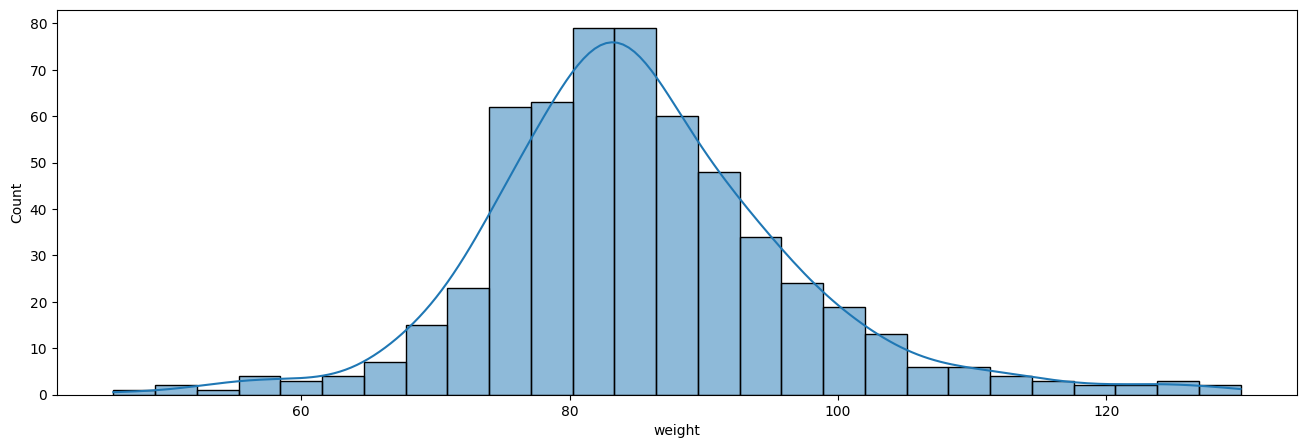

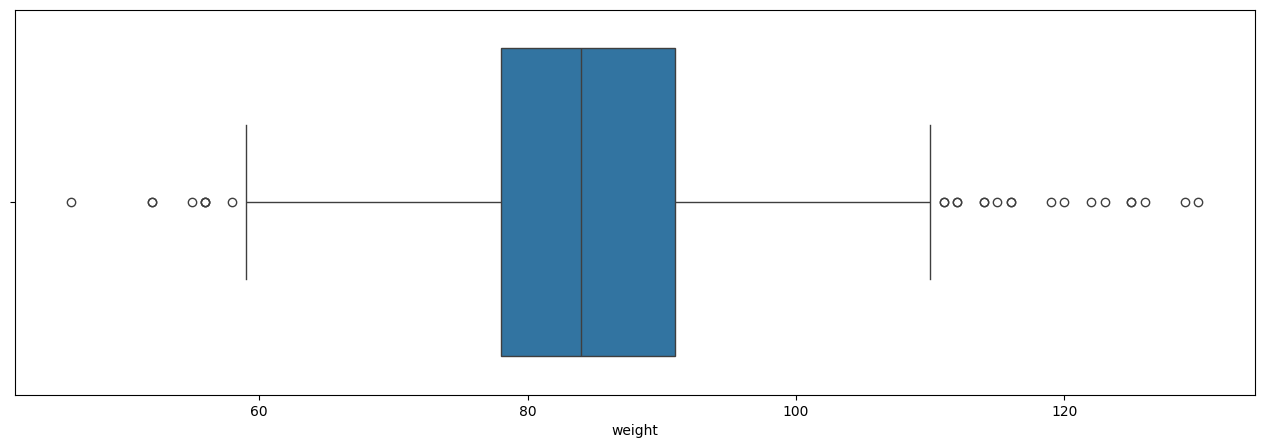

In [13]:
visualize(dataset['weight'], 'numeric')

The outliers seems a lot in upper 110 rather than below 60.

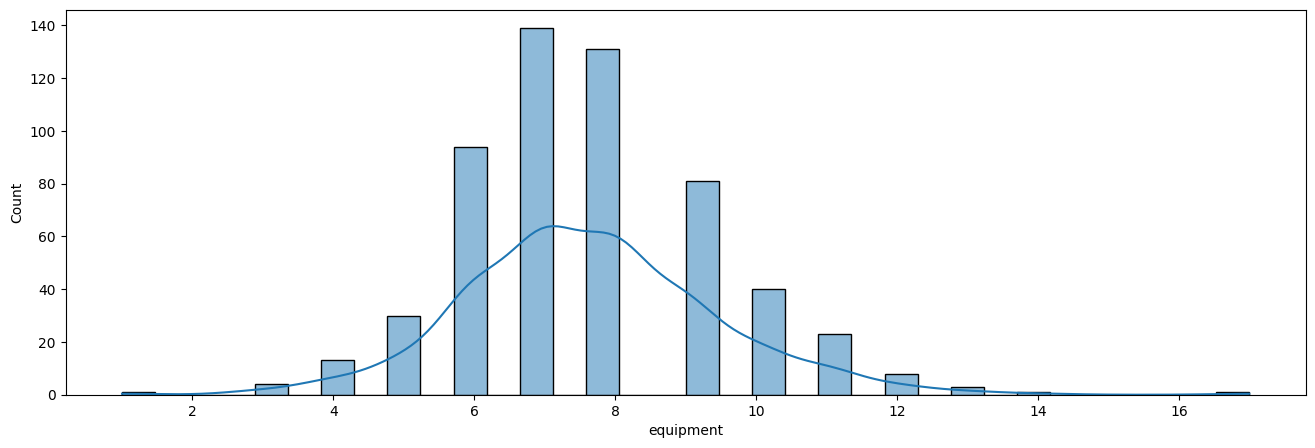

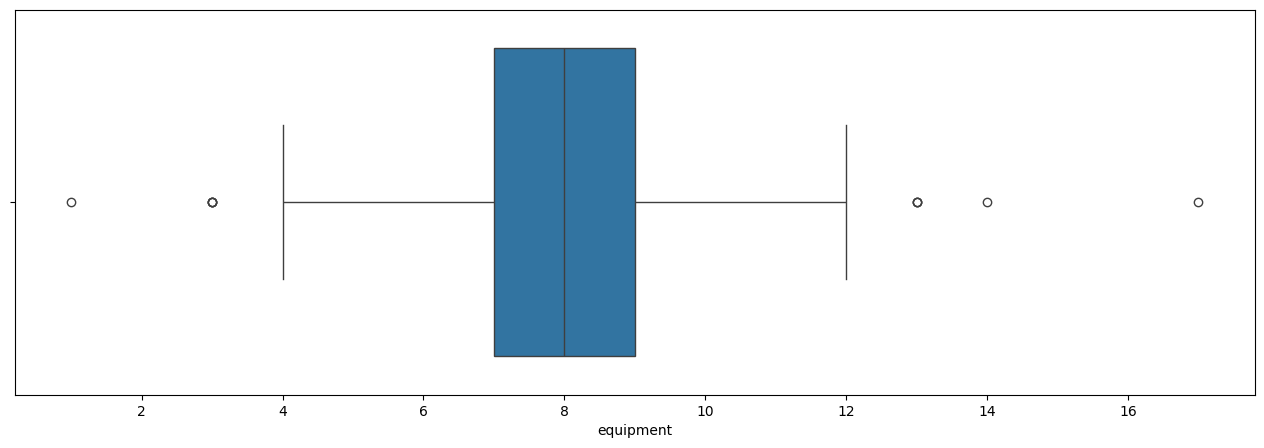

In [14]:
visualize(dataset['equipment'], 'numeric')

The customers mostly use 8 equipments for their exercise.

### Categorical

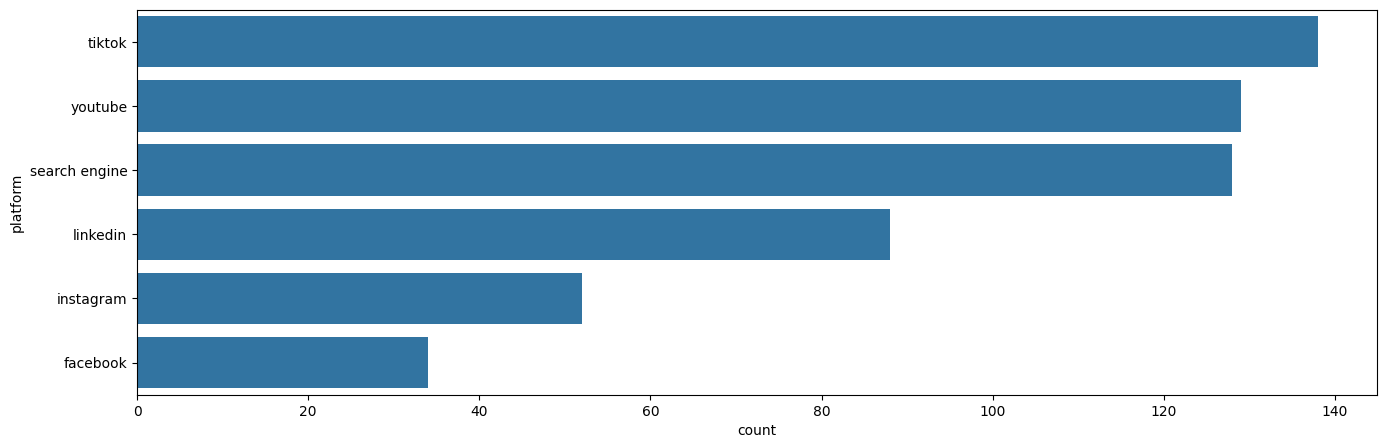

In [15]:
visualize(dataset['platform'].value_counts(), 'categorical')

Most customer acquisition comes from Instagram, followed by Youtube and Facebook.

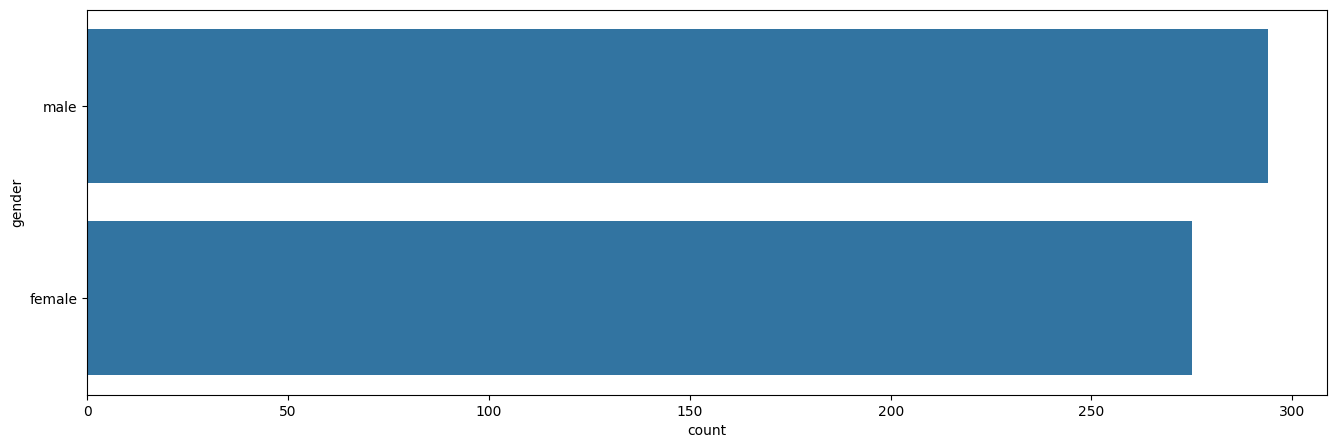

In [16]:
visualize(dataset['gender'].value_counts(), 'categorical')

Male customers are more than female customers.

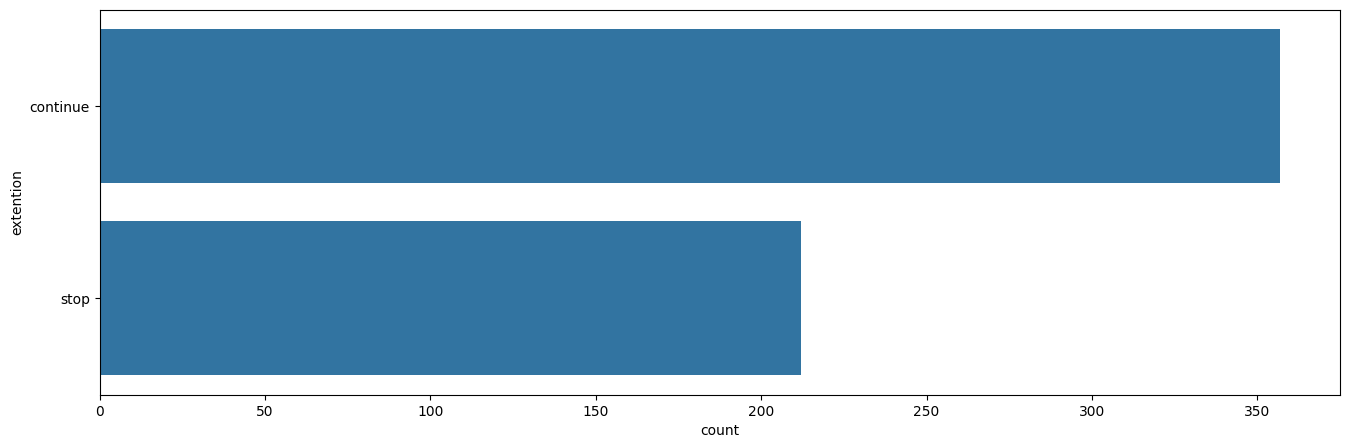

In [17]:
visualize(dataset['extention'].value_counts(), 'categorical')

In [18]:
print(dataset['extention'].value_counts()/len(dataset))

extention
continue    0.627417
stop        0.372583
Name: count, dtype: float64


It is good news because more than 60% our customers decide to continue after first month trial.

## Bivariate Analysis

In [19]:
dataset.columns

Index(['distance (km)', 'visit', 'price_value', 'height', 'weight',
       'equipment', 'platform', 'extention', 'gender'],
      dtype='object')

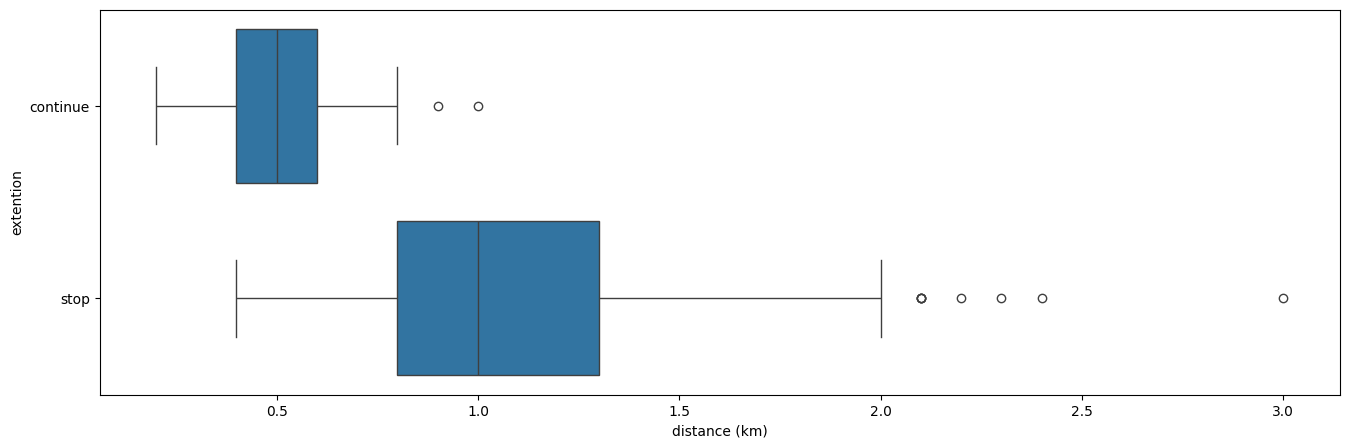

In [20]:
plt.figure(figsize=(16,5))
sns.boxplot(dataset, x='distance (km)', y='extention')
plt.show()

Customers who are near to the fitness center tend to continue after first month trial.

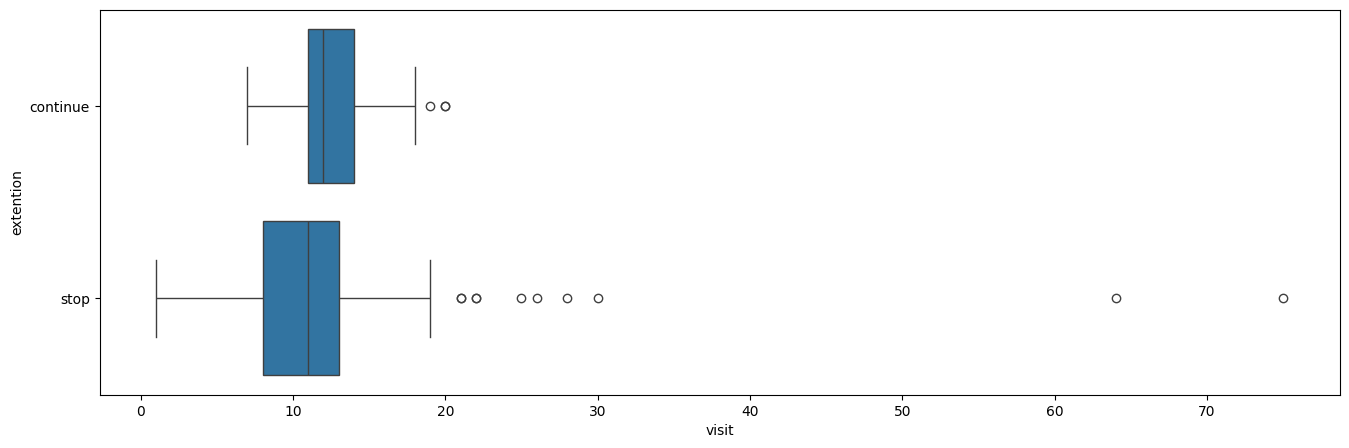

In [21]:
plt.figure(figsize=(16,5))
sns.boxplot(dataset, x='visit', y='extention')
plt.show()

The distribution for customers who decide to continue is more conical than customers who decide to stop for visit frequency variable.

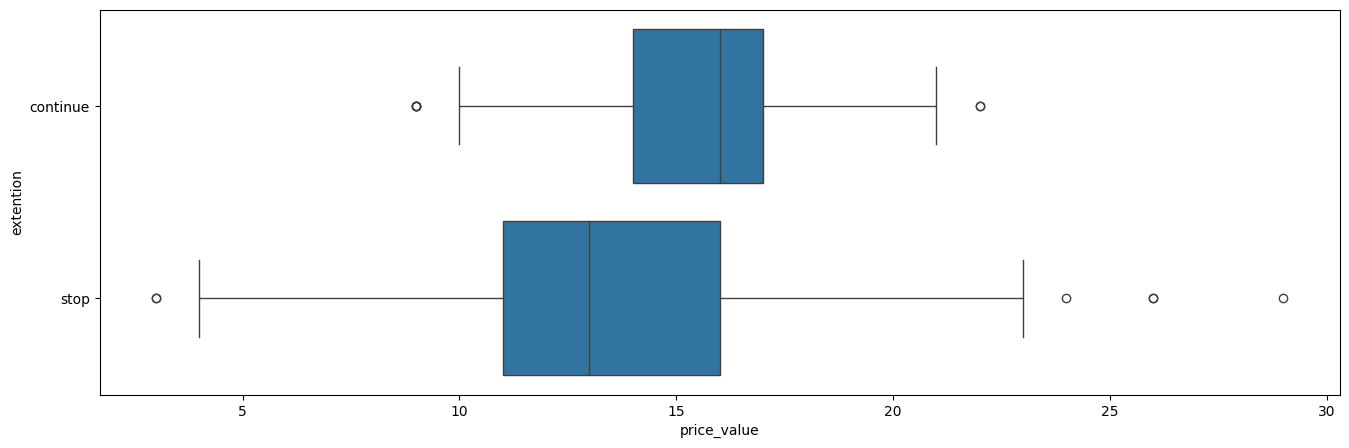

In [22]:
plt.figure(figsize=(16,5))
sns.boxplot(dataset, x='price_value', y='extention')
plt.show()

The customers who decide to continue has higher medium value for rating the price.

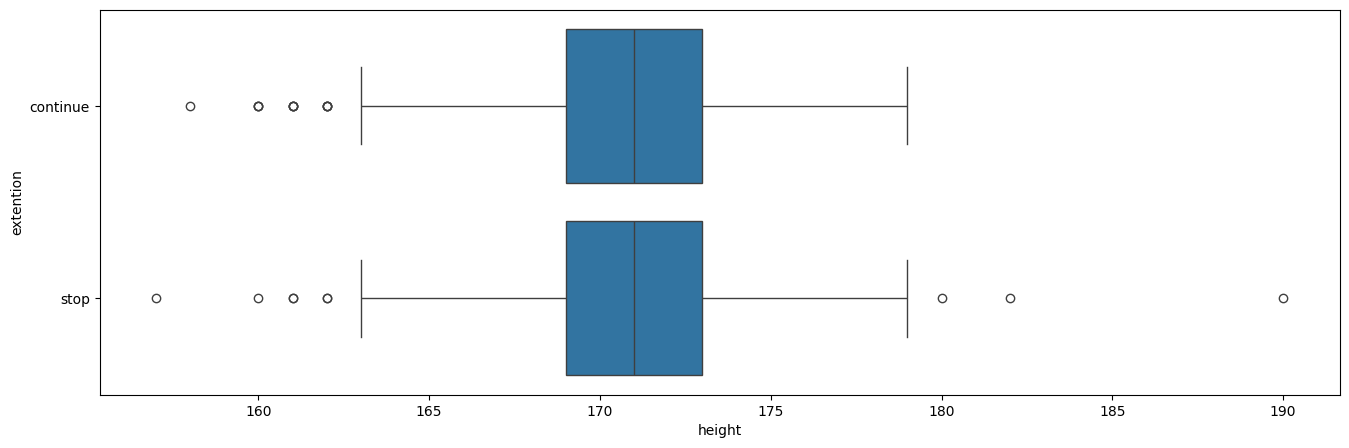

In [23]:
plt.figure(figsize=(16,5))
sns.boxplot(dataset, x='height', y='extention')
plt.show()

Both customers who continue and stop have similar value for height variable.

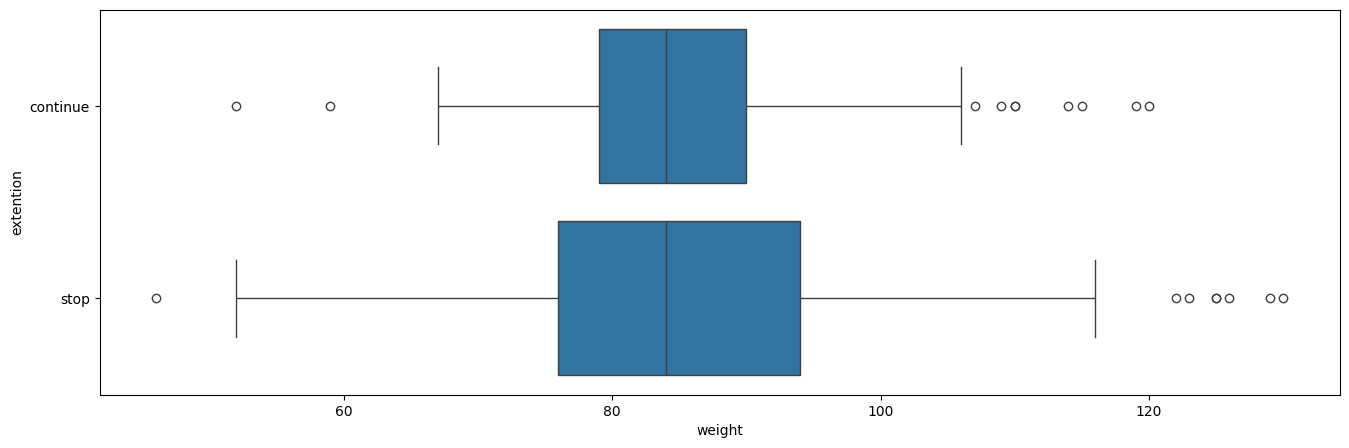

In [24]:
plt.figure(figsize=(16,5))
sns.boxplot(dataset, x='weight', y='extention')
plt.show()

The distribution for customers who decide to continue is more conical than customers who decide to stop for weight variable.

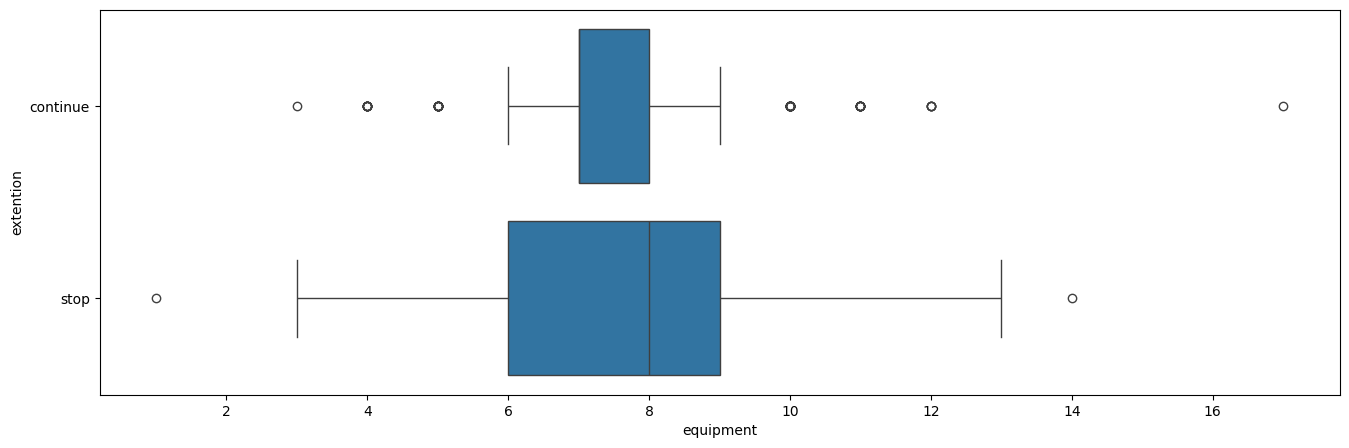

In [25]:
plt.figure(figsize=(16,5))
sns.boxplot(dataset, x='equipment', y='extention')
plt.show()

The distribution for customers who decide to continue is more conical than customers who decide to stop with value around 7 or 8 for equipment variable.

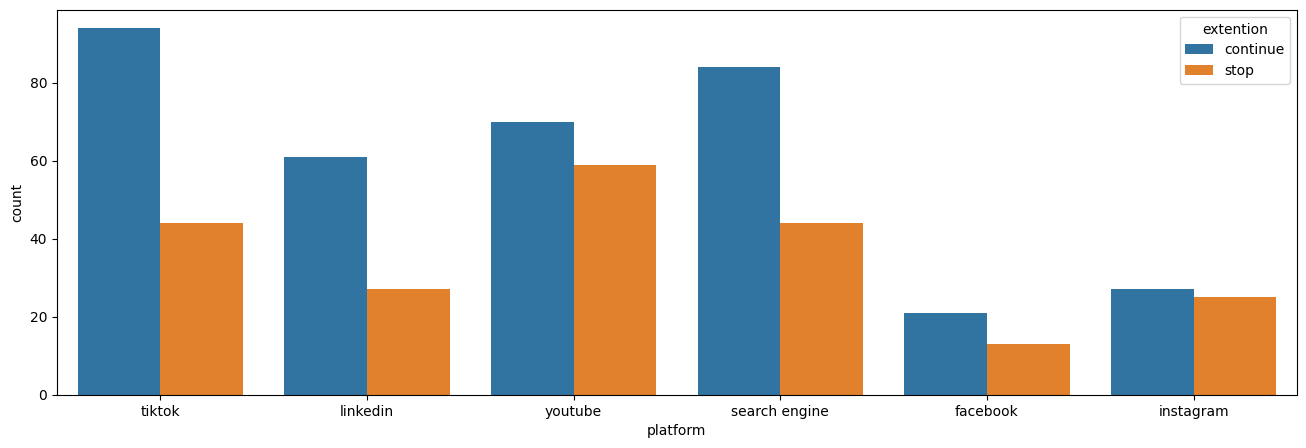

In [26]:
plt.figure(figsize=(16,5))
sns.countplot(dataset, x='platform', hue='extention')
plt.show()

In [27]:
percentage_platform = pd.DataFrame((pd.crosstab(dataset.platform, dataset.extention).T/dataset.platform.value_counts()).T).reset_index()

In [28]:
print(pd.merge(percentage_platform, dataset.platform.value_counts(), on='platform').sort_values('count').round(3))

        platform  continue   stop  count
0       facebook     0.618  0.382     34
1      instagram     0.519  0.481     52
2       linkedin     0.693  0.307     88
3  search engine     0.656  0.344    128
5        youtube     0.543  0.457    129
4         tiktok     0.681  0.319    138


 For this campaign, the most effective ad platform is using linkedin with 69.3% customers decide to continue subscribing, followed by tiktok with 68.1% customers from 138 decide to continue subscribing.

In [29]:
percentage_gender = pd.DataFrame((pd.crosstab(dataset.gender, dataset.extention).T/dataset.gender.value_counts()).T).reset_index()

In [30]:
print(pd.merge(percentage_gender, dataset.gender.value_counts(), on='gender').sort_values('count').round(3))

   gender  continue   stop  count
0  female     0.716  0.284    275
1    male     0.544  0.456    294


About 71.6% from 275 female customers decide to continue subscribing which is more than male customers with 54.4% from 294.

# Data Preprocessing

Because the data is small, we cannot just remove the outliers. We will use the algorithm some ensemble method or SVM which is robust to outliers.

## Split Feature and Target Variable

In [31]:
x = dataset.drop('extention', axis=1)
y = dataset['extention']

## Split Numeric and Categorical Feature

In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance (km)  569 non-null    float64
 1   visit          569 non-null    int64  
 2   price_value    569 non-null    int64  
 3   height         569 non-null    int64  
 4   weight         569 non-null    int64  
 5   equipment      569 non-null    int64  
 6   platform       569 non-null    object 
 7   gender         569 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 35.7+ KB


In [33]:
x_numeric = x[x.columns[:6]]
x_categorical = x[x.columns[6:]]

## Feature Transformation

There are two most popular feature transformation which are standardization and normalization. To apply one of them, we need to know if the variable is normally distributed.

In [34]:
from scipy import stats

def normal(x, variable):
    stat_1, p_1 = stats.normaltest(x)
    if p_1 > 0.05:
        print(f"{variable.upper()} variable pearson p_value is lower than 0.05 with value {p_1}")
    else:
        print(f"{variable.upper()} variable pearson p_value IS NOT NORMALLY DISTRIBUTED")

def shapiro(x, variable):
    stat_2, p_2 = stats.shapiro(x)
    if p_2 > 0.05:
        print(f"{variable.upper()} variable shapiro p_value is lower than 0.05 with vvalue {p_2}")
    else:
        print(f"{variable.upper()} variable pearson p_value IS NOT NORMALLY DISTRIBUTED")


In [35]:
for i in x_numeric:
    normal(x_numeric[i], i)

DISTANCE (KM) variable pearson p_value IS NOT NORMALLY DISTRIBUTED
VISIT variable pearson p_value IS NOT NORMALLY DISTRIBUTED
PRICE_VALUE variable pearson p_value IS NOT NORMALLY DISTRIBUTED
HEIGHT variable pearson p_value IS NOT NORMALLY DISTRIBUTED
WEIGHT variable pearson p_value IS NOT NORMALLY DISTRIBUTED
EQUIPMENT variable pearson p_value IS NOT NORMALLY DISTRIBUTED


In [36]:
for i in x_numeric:
    shapiro(x_numeric[i], i)

DISTANCE (KM) variable pearson p_value IS NOT NORMALLY DISTRIBUTED
VISIT variable pearson p_value IS NOT NORMALLY DISTRIBUTED
PRICE_VALUE variable pearson p_value IS NOT NORMALLY DISTRIBUTED
HEIGHT variable pearson p_value IS NOT NORMALLY DISTRIBUTED
WEIGHT variable pearson p_value IS NOT NORMALLY DISTRIBUTED
EQUIPMENT variable pearson p_value IS NOT NORMALLY DISTRIBUTED


Because there are no variables that are normally distributed using pearson and shapiro, we will use normalization.

In [37]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

In [38]:
normal = MinMaxScaler()
x_normal_numeric = normal.fit_transform(x_numeric)

categorical = OneHotEncoder()
x_scaler_categorical = categorical.fit_transform(x_categorical).toarray()

In [39]:
label = LabelEncoder()
y = label.fit_transform(y)

In [40]:
def merge(numeric, categorical):
    return np.concat((numeric, categorical), axis=1)

In [41]:
x_scaler = merge(x_normal_numeric, x_scaler_categorical)

## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, train_size=0.8, stratify=y)

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 14)
(114, 14)
(455,)
(114,)


# Modeling

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

In [46]:
models = [
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

names = [
    'Random Forest',
    'Gradient Boosting'
]

In [80]:
scores = []
for i in models:
    clf = np.mean(cross_val_score(i, X=x_train, y=y_train, cv=5)).round(3)
    scores.append(clf)

In [81]:
print(pd.DataFrame({
    'name': names,
    'score': scores
}))

                name  score
0      Random Forest  0.923
1  Gradient Boosting  0.930


To me, gradient boosting already works great with its default parameters. But I we know that ensemble learning is famous with its overfitting. Let's see if we can optimize the parameters. We will also use xgboost gradient boosting.

## Hyperparameters Tuning

In [82]:
params = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [83]:
import xgboost as xgb

In [84]:
random = RandomizedSearchCV(
    xgb.XGBClassifier(), 
    params, 
    scoring='accuracy',
    cv=5, 
    verbose=1)

In [85]:
print(random.fit(x_train, y_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan

In [86]:
print(random.best_params_)
print(random.best_score_)

{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
0.9362637362637362


## Creating Algorithm Using Gradient Boosting

In [87]:
model = xgb.XGBClassifier(**random.best_params_)

In [88]:
print(model.fit(x_scaler, y))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [89]:
feature = pd.DataFrame({
    'feature': np.concat((normal.get_feature_names_out(), categorical.get_feature_names_out())),
    'score': model.feature_importances_.round(2)})

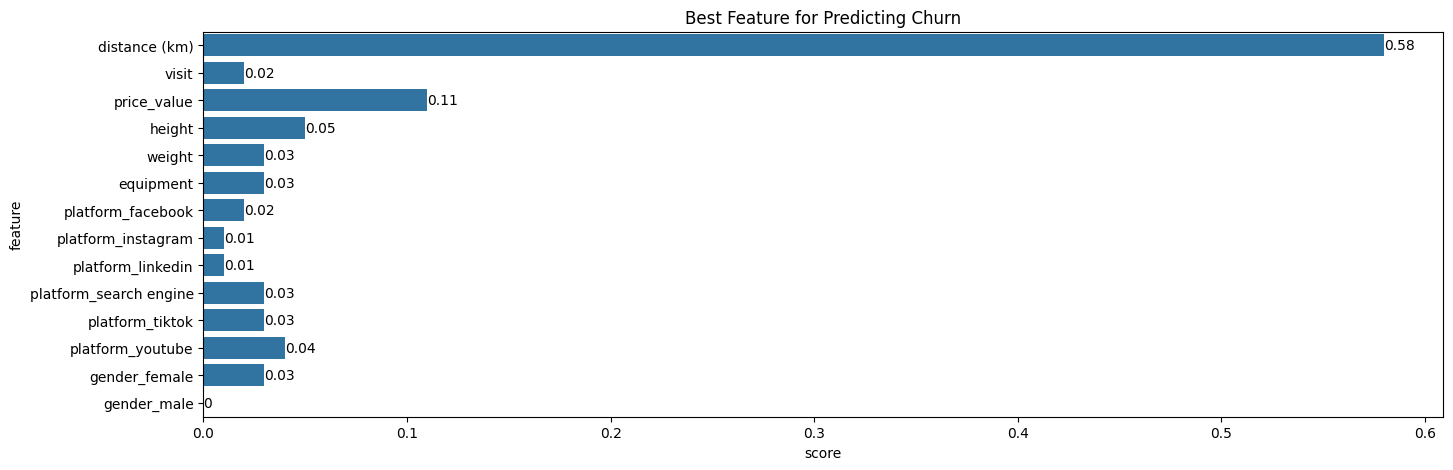

In [90]:
plt.figure(figsize=(16,5))
gram = sns.barplot(feature, x='score', y='feature')
gram.bar_label(gram.containers[0])
plt.title('Best Feature for Predicting Churn')
plt.show()

In [91]:
def input_feature(x):
    """
    CHANGE YOUR INPUT INTO NUMPY
    """
    num = x[:6].reshape(1,-1)
    sca = normal.transform(num)

    cat = x[6:].reshape(1,-1)
    cat = categorical.transform(cat).toarray()
    return merge(sca, cat)

In [92]:
example = x.iloc[56].values

In [93]:
dataset.iloc[56]

distance (km)         0.5
visit                  15
price_value            15
height                171
weight                 92
equipment              10
platform          youtube
extention        continue
gender               male
Name: 56, dtype: object

In [94]:
def predict(x):
    """
    CHANGE YOUR INPUT INTO NUMPY
    """
    return label.inverse_transform(model.predict(input_feature(x))), model.predict(input_feature(x))

In [95]:
predict(example)

(array(['continue'], dtype=object), array([0]))

# Insights

## Interpretation and Reporting

- 60% of customers choose to continue their subscription after the first-month trial, indicating a relatively strong retention rate despite the initial discount.
- Customers who live closer to the fitness center are more likely to continue their subscription after the first month, suggesting that convenience and accessibility play a key role in retention.
- The distribution of visit frequency for customers who continue their subscription is more concentrated (conical) compared to those who cancel. This indicates that regular visitors are more likely to remain subscribed.
- Customers who continue their subscription tend to have a higher median rating for the fitness center's pricing, implying that perceived value for money influences their decision to stay.
- There is no significant difference in the height variable between customers who continue and those who stop their subscription, suggesting that height does not play a major role in the retention decision.
- Similar to the visit frequency distribution, the weight distribution for customers who continue their subscription is more conical than for those who stop. This suggests that customers within certain weight ranges are more likely to stay subscribed.
- Customers who continue their subscription show a more concentrated distribution around a rating of 7 or 8 for equipment quality, indicating that those with positive perceptions of the equipment are more likely to retain their membership.
- LinkedIn proves to be the most effective advertising platform for customer retention, with 69.3% of customers who saw ads on LinkedIn choosing to continue their subscription. TikTok follows closely, with 68.1% retention among 138 customers.
- Female customers have a higher retention rate (71.6%) compared to male customers (54.4%), suggesting that women may have a stronger connection or satisfaction with the fitness center's offerings.

## Action

**Overcome Distance Problem:**
- Offer fitness from home program with loaned tools.
- Offer online class or virtual training program for those who has problem with distance.

**Flexible Pricing Strategy:**
- Offer subscription package with various price and benefits.
- Give special promo or discount for customers who are committed for long term

**Optimize Marketing:**
- Target ads to more specific and relevant customers segmentation.
- Create interesting and relevant content for TikTok.

**Personalize Customer Experience:**
- Give special attention for women customers and find out what makes them uncomfortable.
- Increase customer involvement and interaction through fitness challenges or community event.

**Collect and Analyze Data:**
- Collect feedback from customers who decide to stop subscribing using survey.
- Monitor churn metrics regularly and identify trends.

# Further Analysis
- Do cluster analysis to provide customer segmentation based on personalization.
- Do time-series analysis to predict the number of customer visits each day.